<a href="https://colab.research.google.com/github/mateus0205/BlueVelvet/blob/master/Atividade4_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importação de bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np



In [2]:
# Carregar o dataset "autism_screening.csv"
data = pd.read_csv('/content/autism_screening.csv')
display(data.head())
display(data.info())
display(data.describe())


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

None

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


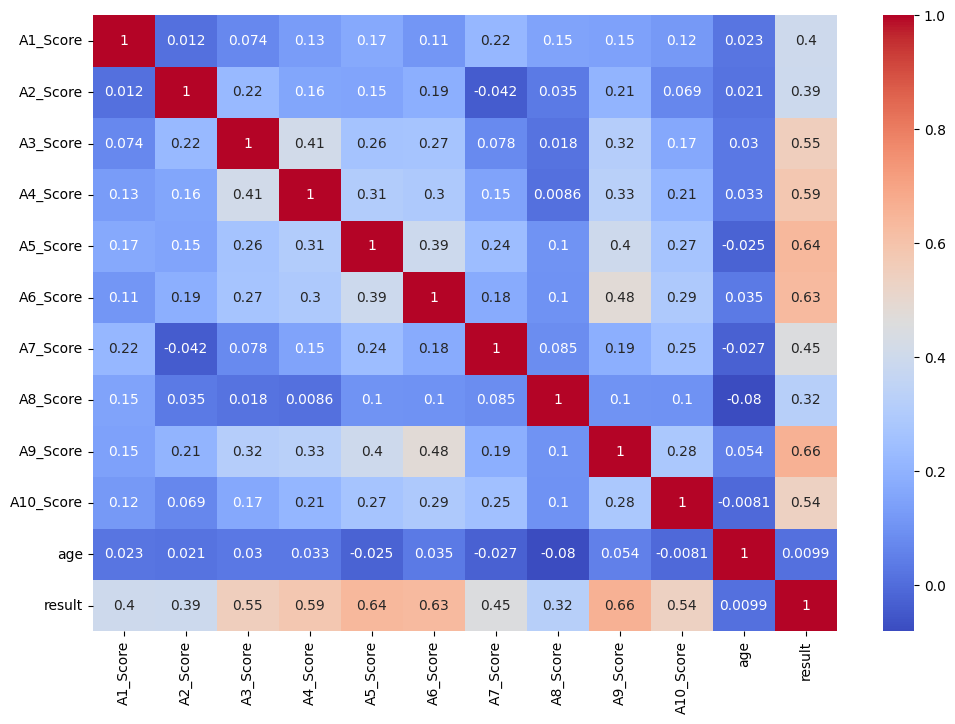

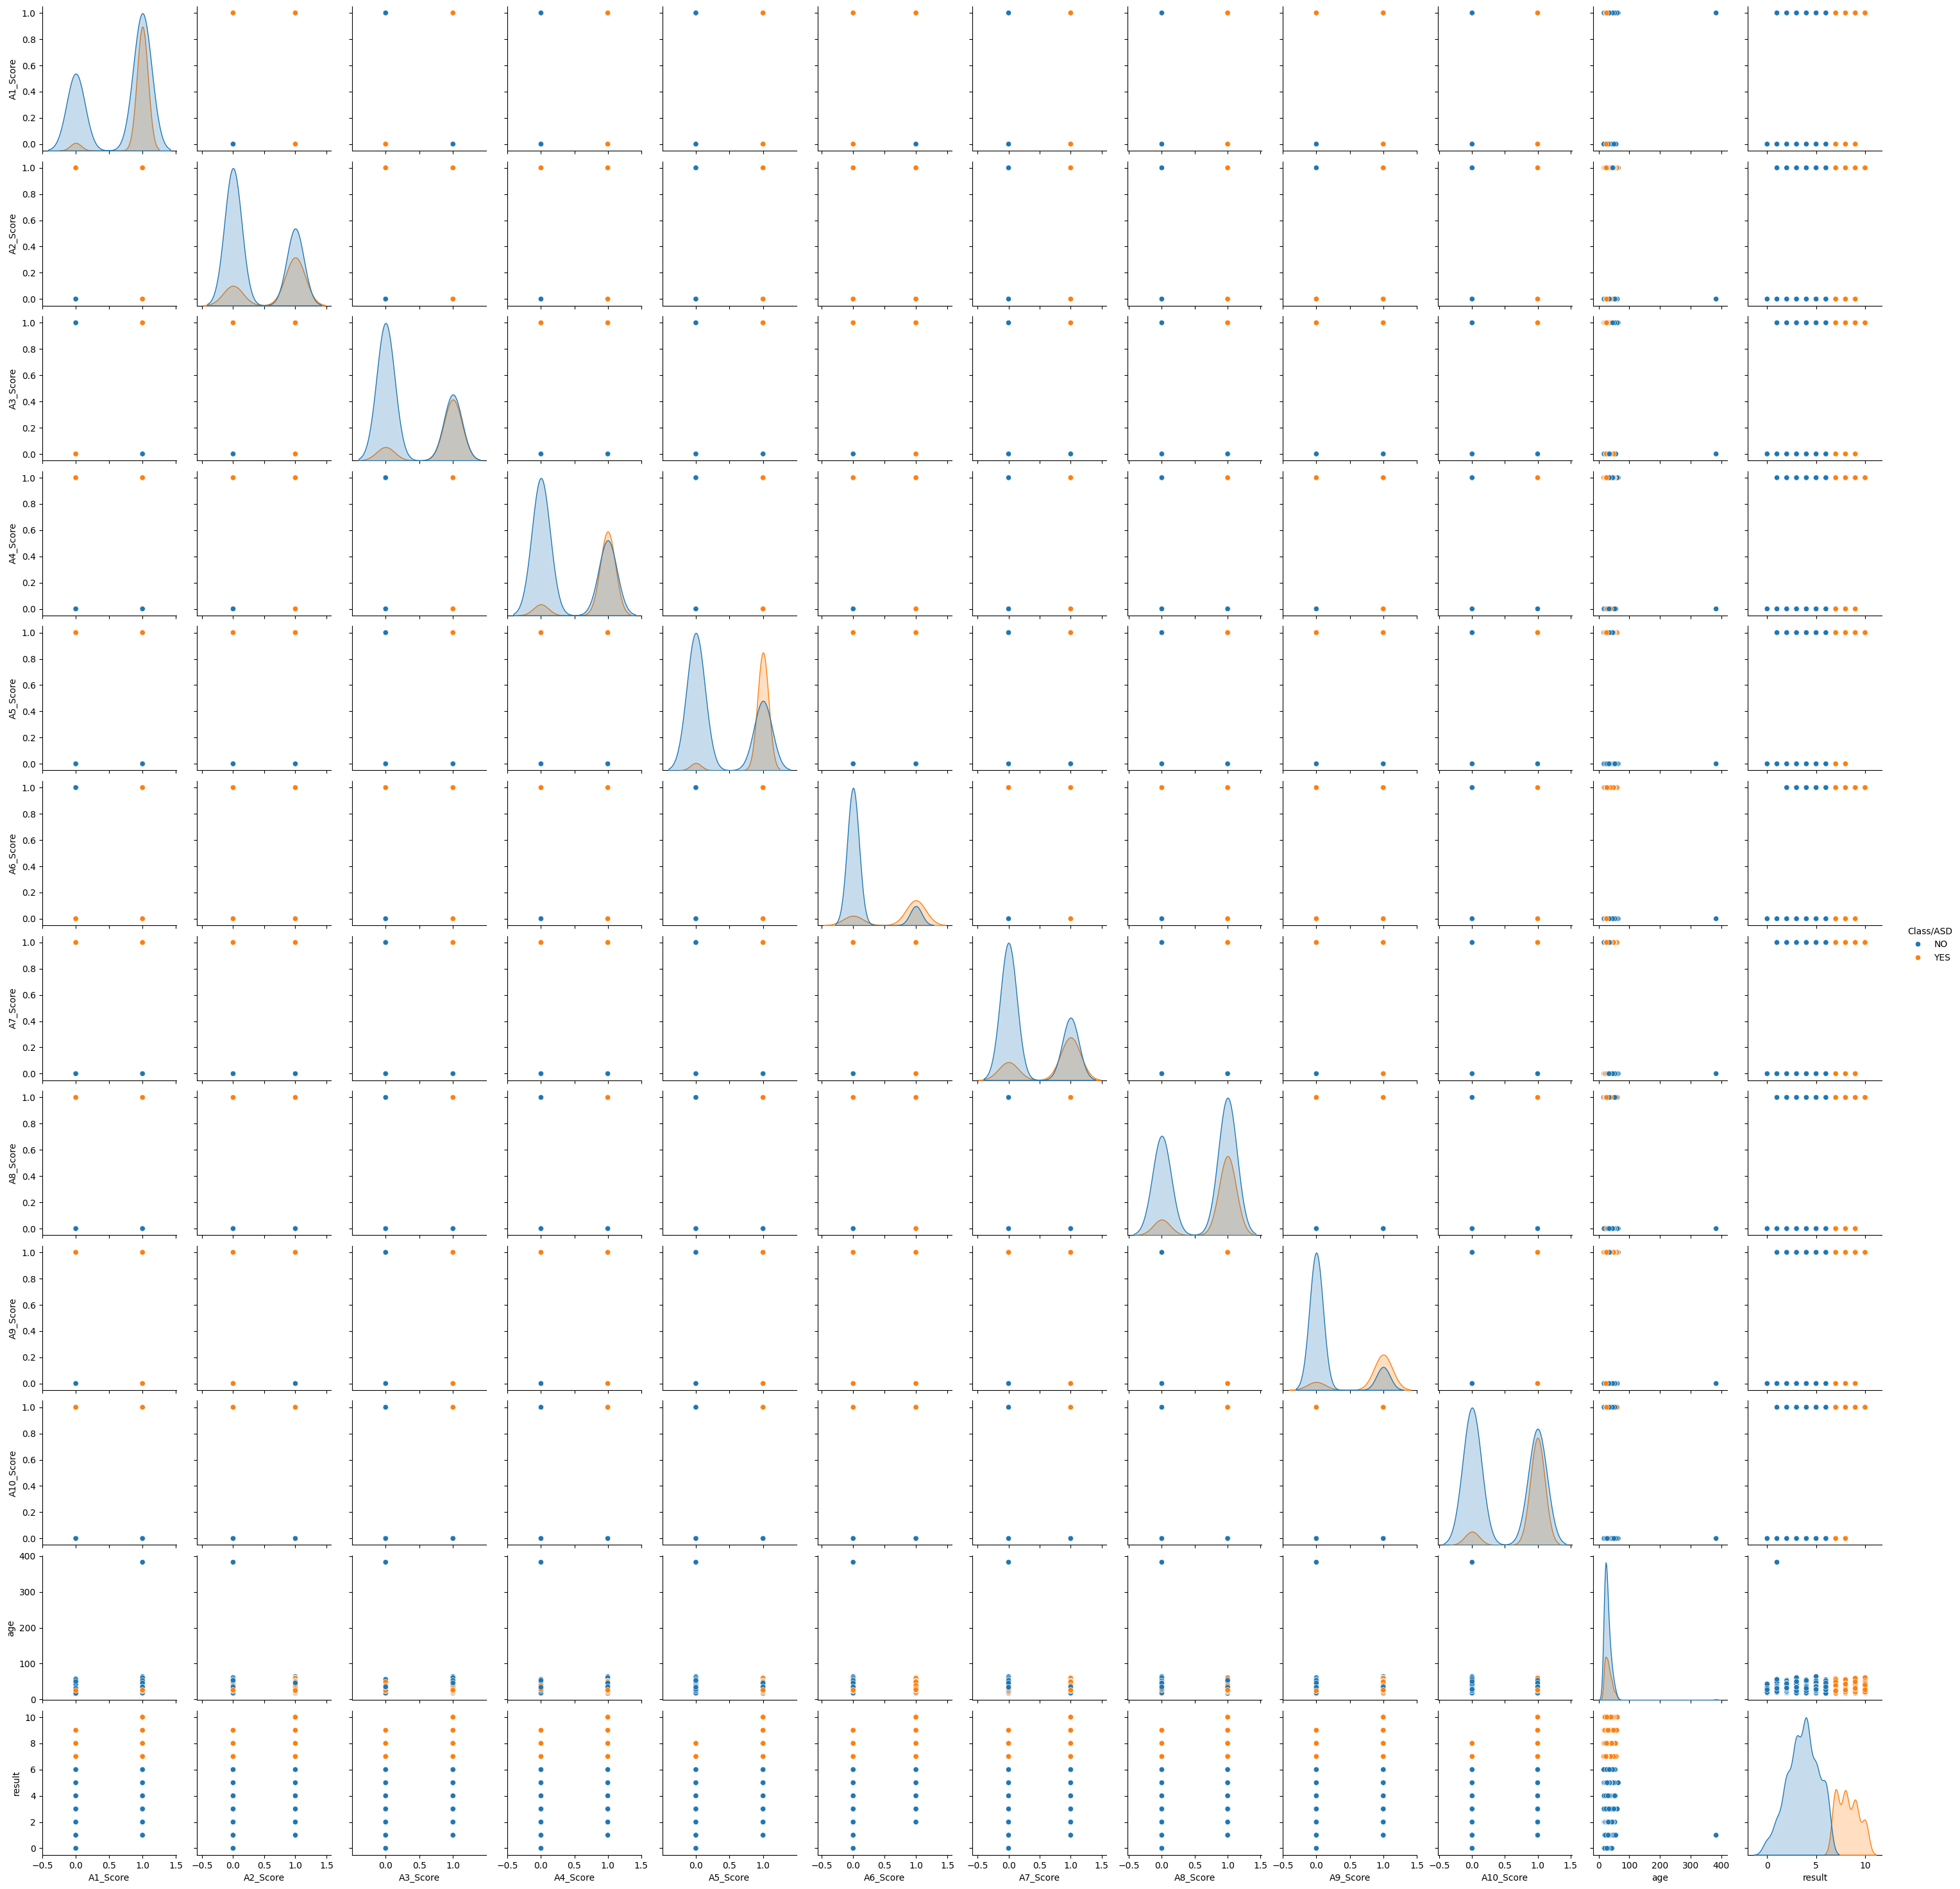

In [3]:
# Filtrar apenas colunas numéricas para calcular a correlação
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Distribuição das variáveis principais
sns.pairplot(data, hue='Class/ASD')  # Use a coluna alvo real


In [4]:

# Seleção das variáveis de entrada relevantes
selected_features = ['result', 'A6_Score', 'A9_Score', 'A5_Score']
X = data[selected_features]
y = data['Class/ASD'].apply(lambda x: 1 if x == 'YES' else 0)

# Converte colunas categóricas em variáveis numéricas usando one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Divisão dos conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [5]:
def train_model_with_params(learning_rate, batch_size, epochs, layers):
    # Criação do modelo
    model = Sequential()
    model.add(Dense(layers[0], input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.01)))

    for neurons in layers[1:]:
        model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(0.01)))
        model.add(Dropout(0.2))

    # Camada de saída
    model.add(Dense(1, activation='sigmoid'))  # Saída binária para classificação

    # Compilação do modelo
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    # Early stopping para evitar sobreajuste
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Treinamento do modelo
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)

    # Previsões e cálculo da precisão
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Avaliação da precisão
    acc = accuracy_score(y_test, y_pred)

    # Debug: imprime a precisão e o formato de y_pred
    print(f"Predictions shape: {y_pred.shape}, Accuracy: {acc}")

    return acc, history, y_pred

# Teste de variações de hiperparâmetros
params = [
    {'learning_rate': 0.001, 'batch_size': 10, 'epochs': 50, 'layers': [16, 8]},
    {'learning_rate': 0.01, 'batch_size': 20, 'epochs': 100, 'layers': [32, 16]},
    {'learning_rate': 0.005, 'batch_size': 32, 'epochs': 75, 'layers': [24, 12]},
    {'learning_rate': 0.01,  'batch_size': 64, 'epochs': 150, 'layers': [32, 16, 8]},
    {'learning_rate': 0.001, 'batch_size': 16, 'epochs': 100, 'layers': [64, 32]},
]

# Avaliação e exibição dos resultados para cada combinação de parâmetros
for param in params:
    acc, history, y_pred = train_model_with_params(**param)
    print(f"Params: {param}, Accuracy: {acc}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predictions shape: (141, 1), Accuracy: 1.0
Params: {'learning_rate': 0.001, 'batch_size': 10, 'epochs': 50, 'layers': [16, 8]}, Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predictions shape: (141, 1), Accuracy: 1.0
Params: {'learning_rate': 0.01, 'batch_size': 20, 'epochs': 100, 'layers': [32, 16]}, Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Predictions shape: (141, 1), Accuracy: 1.0
Params: {'learning_rate': 0.005, 'batch_size': 32, 'epochs': 75, 'layers': [24, 12]}, Accuracy: 1.0
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predictions shape: (141, 1), Accuracy: 1.0
Params: {'learning_rate': 0.01, 'batch_size': 64, 'epochs': 150, 'layers': [32, 16, 8]}, Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predictions shape: (141, 1), Accuracy: 1.0
Params: {'learning_rate': 0.001, 'batch_size': 16, 'epochs': 100, 'layers': [64, 32]}, Accuracy: 1.0


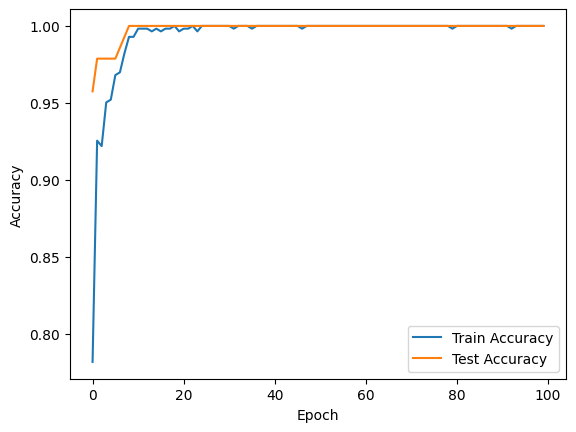

In [6]:
# Gráfico de desempenho de cada modelo
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Avaliação final de métricas
# Defina o limiar (threshold) que deseja usar (0.5 ou 0.2)
threshold = 0.2  # ou 0.2, conforme preferir

# Check the shape of X_test and y_test
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Make predictions
try:
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > threshold).astype("int32")

    # Calcula as métricas de precisão, recall e F1
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Precisão: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

except Exception as e:
    print(f"An error occurred during prediction: {e}")


Shape of X_test: (141, 4)
Shape of y_test: (141,)
An error occurred during prediction: name 'model' is not defined


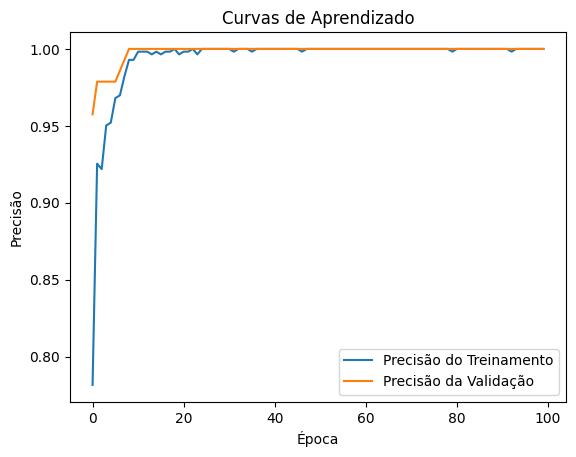

In [8]:
import matplotlib.pyplot as plt

# Extrai o histórico de precisão do treinamento
train_accuracy = history.history['accuracy']
# Extrai o histórico de precisão da validação (teste)
val_accuracy = history.history['val_accuracy']

# Cria o gráfico
plt.plot(train_accuracy, label='Precisão do Treinamento')
plt.plot(val_accuracy, label='Precisão da Validação')
plt.title('Curvas de Aprendizado')
plt.xlabel('Época')
plt.ylabel('Precisão')
plt.legend()
plt.show()

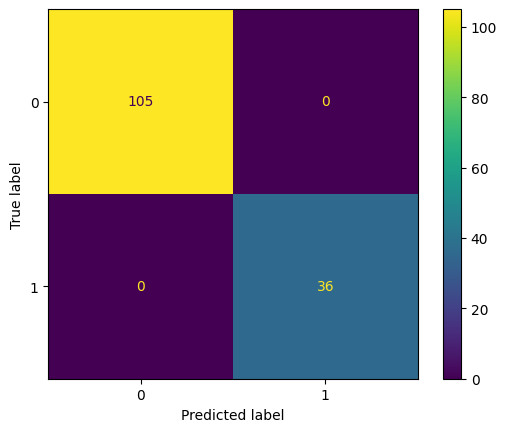

In [9]:
# Calcula a matriz de confusão com y_pred do último modelo treinado
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Class/ASD    1.000000
result       0.821445
A9_Score     0.635576
A6_Score     0.592091
A5_Score     0.537004
A4_Score     0.469945
A3_Score     0.441074
A10_Score    0.385917
A7_Score     0.351429
A2_Score     0.311382
A1_Score     0.297628
A8_Score     0.237161
age          0.059200
Name: Class/ASD, dtype: float64


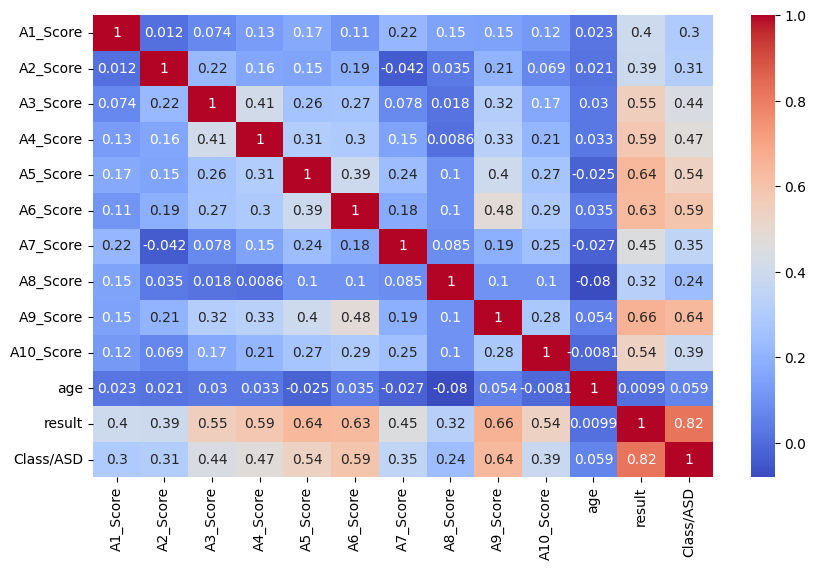

In [ ]:
#NAO PRECISA COLOCAR

# Converter 'Class/ASD' em valores binários
data['Class/ASD'] = data['Class/ASD'].apply(lambda x: 1 if x == 'YES' else 0)

# Calcular a correlação entre 'Class/ASD' e as demais variáveis numéricas
numeric_data = data.select_dtypes(include=[np.number])
correlations = numeric_data.corr()['Class/ASD'].sort_values(ascending=False)
print(correlations)

# Exibir o heatmap com a correlação
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()
